# **Lab 2: Data Preparation**

## Import Python Modules and Dataset

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from scipy.stats import iqr
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/mandricic/CS5062/master/bank.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


To check for missing values we can use df.isna().sum() or df.isnull().sum()

In [62]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [63]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

There are 5 Attributes that contain Null values. Only one attribute is Numeric, other are Categorical Attributes<br/>

Before I start making any change I will create copy of our dataser

In [0]:
df_original = df

Task 1: encoded all categorical attributes as numerical <br/>
Task 2: filled in all missing values

I will work on first two task simultaneously

**Encode Categorical Attributes** 

First attribute that I will encode is **Month**
<br/>
I will use Numerical representation for each Month.

In [0]:
month_mapper = {
    "jan":1,
    "feb":2,
    "mar":3,
    "apr":4,
    "may":5,
    "jun":6,
    "jul":7,
    "aug":8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
}
df['month'] = df['month'].replace(month_mapper)

In [66]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,4,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,4,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,4,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,4,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,4,285,3,132,2,failure,no


**One-Hot Encode** 
Second Attribute is **Contact**. <br/>
For contact we can have only 2 possible values; '*telephone*' and '*cellular*'. <br/>
There is big difference in the count of those two values in our dataset;
*Cellular* have 1663 and **telephone** have 146. <br/>
We have 191 empty values. <br/>
In this case I will use get_dummies methid with option to exclude first option.

In [67]:
df = pd.get_dummies(df, columns=['contact'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail() 

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed,contact_telephone,contact_nan
1995,20.0,student,single,NaN,no,2785,no,no,16,9,327,2,-1,0,NaN,yes,0,0
1996,28.0,admin.,single,secondary,no,127,no,no,16,9,1334,2,-1,0,NaN,yes,0,0
1997,81.0,retired,married,primary,no,1154,no,no,17,9,231,1,-1,0,NaN,yes,1,0
1998,46.0,services,married,primary,no,4343,yes,no,20,9,185,1,-1,0,NaN,yes,0,1
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,22,9,208,2,-1,0,NaN,yes,0,0


In example above we can see that now we have 2 new Attributes: **Contact_telepone** and **Contact_nan**. <br/>
They are replacing Attribute Contact.<br/> Contact_telepone and Contact_nan Attributes are Numerical Attributes that can contain 0 or 1 values, which represents 'false' or 'true'

In [15]:
df['contact_telephone'].value_counts() 

0    1854
1     146
Name: contact_telephone, dtype: int64

In [68]:
df['contact_nan'].value_counts() 

0    1809
1     191
Name: contact_nan, dtype: int64

This attributes are used to find out how many contact types are not recorder, and how many calls are made by the telephone. <br/>
By getting those value, I can find out how many calls were made by the cellular

In [69]:
# df['contact_telephone'].count() === 2000
# df['contact_telephone'].loc[df['contact_telephone'] ==1].value_counts() === 146 
# df['contact_nan'].loc[df['contact_nan'] == 1].value_counts() === 191
# 2000 - (146+191) 
# contacted by cellular = 1663

print('contacted by cellular = '+ repr((df['contact_telephone'].count() - sum(
df['contact_telephone'].loc[df['contact_telephone'] ==1].value_counts(),
df['contact_nan'].loc[df['contact_nan'] == 1].value_counts())).sum()))

contacted by cellular = 1663


Next Attribute that I will convert into Numerical is **poutcome** <br/>
This Attribute have 3 possible values '*failure*', '*success*' and '*other*'. <br/>
poutcome have 454 empty rows as we can see below.

In [70]:
df['poutcome'].isna().sum()

454

If **poutcome** have NULL value, that means that call was not made to the Client in a previous campaigns.<br/>
My first step is to replace *NULL* values with *failure*.<br/>
By looking at attribute '**previous**' I can see if Client was previously contacted.<br/>
Because of that NULL values under poutcome can be replaced by *failure*  

In [0]:
# replace null value with failure
df['poutcome'].fillna('failure', inplace=True) 

I will use the same approach that I used for contact attribute. Only difference is that I will kip first option and I don’t need option dummy_na

In [74]:
df = pd.get_dummies(df, columns=['poutcome'] )
df.tail() 

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success
1995,20.0,student,single,NaN,no,2785,no,no,16,9,327,2,-1,0,yes,0,0,1,0,0
1996,28.0,admin.,single,secondary,no,127,no,no,16,9,1334,2,-1,0,yes,0,0,1,0,0
1997,81.0,retired,married,primary,no,1154,no,no,17,9,231,1,-1,0,yes,1,0,1,0,0
1998,46.0,services,married,primary,no,4343,yes,no,20,9,185,1,-1,0,yes,0,1,1,0,0
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,22,9,208,2,-1,0,yes,0,0,1,0,0


In example above we can see that there are 3 new Attributes: **poutcome_failure**, **poutcome_other** and **poutcome_success**. They are replacing Attribute poutcome. <br/>
New Attributes are Numerical Attributes that can contain 0 or 1 , which represents 'false' or 'true'

In [75]:
df['poutcome_other'].value_counts() 

0    1853
1     147
Name: poutcome_other, dtype: int64

In [76]:
df['poutcome_success'].value_counts() 

0    1556
1     444
Name: poutcome_success, dtype: int64

In [77]:
df['poutcome_failure'].value_counts() 

1    1409
0     591
Name: poutcome_failure, dtype: int64

To find out how many Clients were not contacted on previous campaign I can use **previous** Attribute and look for '0'.<br/>
Then I can subtract total of **poutcome_failure** where the value is 1 <br/>
*(df['poutcome_failure'].loc[df['poutcome_failure'] ==1].value_counts()) with total count of previous where value is 0 (e.g. df['previous'].loc[df['previous'] == 0].value_counts())*

In [78]:
print('Previous failure = '+ 
      repr(
         sum (
                  df['poutcome_failure'].loc[df['poutcome_failure'] ==1].value_counts(), - 
                  df['previous'].loc[df['previous'] == 0].value_counts()
              ).sum()
          )+'\n'+
      'Previously Not Contacted = '+ 
      repr( 
            (df['previous'].loc[df['previous'] == 0].value_counts()
              ).sum()
          )
    )

Previous failure = 955
Previously Not Contacted = 454


Next Attribute that I will convert into Numerical is **job**. <br/>
This Attribute have *11 possible values*. Best option to do here is to replace existing value with number. As we can see below

In [79]:
job_mapper = {
    "admin.":1,
    "blue-collar":2,
    "entrepreneur":3,
    "housemaid":4,
    "management":5,
    "retired":6,
    "self-employed":7,
    "services":8,
    "student":9,
    "technician":10,
    "unemployed":11 
}

df['job'] = df['job'].replace(job_mapper)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success
0,32.0,10.0,single,tertiary,no,392,yes,no,1,4,957,2,131,2,no,0,0,1,0,0
1,39.0,10.0,divorced,secondary,no,688,yes,yes,1,4,233,2,133,1,no,0,0,1,0,0
2,59.0,6.0,married,secondary,no,1035,yes,yes,1,4,126,2,239,1,no,0,0,1,0,0
3,47.0,2.0,married,secondary,no,398,yes,yes,1,4,274,1,238,2,no,0,0,1,0,0
4,54.0,6.0,married,secondary,no,1004,yes,no,1,4,479,1,307,1,no,0,0,1,0,0
5,46.0,7.0,divorced,tertiary,no,926,yes,no,1,4,463,1,133,3,no,0,0,1,0,0
6,34.0,2.0,married,secondary,no,1924,yes,yes,1,4,161,2,253,1,no,0,0,1,0,0
7,45.0,8.0,divorced,secondary,no,396,yes,yes,1,4,251,4,329,4,no,0,0,1,0,0
8,58.0,5.0,divorced,tertiary,no,315,yes,no,1,4,121,2,135,2,no,0,0,1,0,0
9,49.0,5.0,divorced,tertiary,no,20727,no,no,1,4,285,3,132,2,no,0,0,1,0,0


**Job** have only **10 missing** records. In this case is safe to replace missing values with value that is used the most. In our case that is '*management*' which was in previous step replaced with Numerical value '5'

In [80]:
df['job'].value_counts()

5.0     461
10.0    348
2.0     298
1.0     247
8.0     165
6.0     162
9.0      96
11.0     69
7.0      64
3.0      45
4.0      35
Name: job, dtype: int64

In [0]:
# replace null value with 5 - index 1 because value_counts() returns walue in the order of the count value desc 
df['job'].fillna(df['job'].value_counts().index[0], inplace=True)

Last categorical attribute that have *NULL* values is '**Education**'<br/>
This Attribute have 3 different values '*primary*' , '**secondary** and '*tertiary*'<br/>
Below we can see that we have 995 *secondary* records, 684 *tertiary* records, 217 *primary* records. There are 104 records without any value.

In [82]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [83]:
df['education'].isna().sum()

104

Before converting Attribute into Numerical, I will fill in blank Values. In this situation *I will use forward fill* option. This way our average values will not change.

In [84]:
df['education'].fillna(method='ffill', inplace=True)
df['education'].value_counts()

secondary    1045
tertiary      725
primary       230
Name: education, dtype: int64

In situation when we have two or more NaN values one after another, value that we want to replace will be replaced with NAN value again.<br/>
This is one of disadvantage of this method.<br/>
In our situation, it worked as expected because we didn’t have case with more than one empty record, one after another

In [85]:
df['education'].isna().sum()

0

To convert **education** Attribute into Numerical, I will use same approach that I used for **poutcome**

In [86]:
df = pd.get_dummies(df, columns=['education'] )
df.tail() 

,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary
1995,20.0,9.0,single,no,2785,no,no,16,9,327,2,-1,0,yes,0,0,1,0,0,0,1,0
1996,28.0,1.0,single,no,127,no,no,16,9,1334,2,-1,0,yes,0,0,1,0,0,0,1,0
1997,81.0,6.0,married,no,1154,no,no,17,9,231,1,-1,0,yes,1,0,1,0,0,1,0,0
1998,46.0,8.0,married,no,4343,yes,no,20,9,185,1,-1,0,yes,0,1,1,0,0,1,0,0
1999,40.0,3.0,married,no,6403,no,no,22,9,208,2,-1,0,yes,0,0,1,0,0,0,1,0


Last Attribute that contains *NULL* value is '**age**'.<br/>
This attribute is already Numerical. Only what we need to do here is to find the best way to fill empty rows. For this I will use ML model to predict Age on the basis of the job value.

In [87]:
ptable = df.pivot_table(values='age', 
                        index='job',
                        columns='education_primary',  
                        aggfunc=np.median)
ptable

education_primary,0,1
job,,
1.0,38.0,48.5
2.0,36.0,42.0
3.0,43.0,55.0
4.0,47.0,50.5
5.0,37.0,45.5
6.0,64.0,70.0
7.0,35.0,NaN
8.0,36.0,47.0
9.0,25.0,22.0


In [0]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job'], x['education_primary']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

There is no more Fields with NULL values

In [89]:
df.isna().sum()

age                    0
job                    0
marital                0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
contact_telephone      0
contact_nan            0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
education_primary      0
education_secondary    0
education_tertiary     0
dtype: int64

We have Categorical Attributes that don’t have NULL value, but they should be converted into Numerical Attributes<br/>
**Default**, **Housing** ,**loan** and **subscribed** attributes have just two possible values '*Yes*' and '*No*' this can be replaced with 1 and 0

In [90]:
bool_mapper = {
    "yes":1,
    "no":0 
}

df['default'] = df['default'].replace(bool_mapper)
df['housing'] = df['housing'].replace(bool_mapper)
df['loan'] = df['loan'].replace(bool_mapper)
df['subscribed'] = df['subscribed'].replace(bool_mapper)
df.head(10)

,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary
0,32.0,10.0,single,0,392,1,0,1,4,957,2,131,2,0,0,0,1,0,0,0,0,1
1,39.0,10.0,divorced,0,688,1,1,1,4,233,2,133,1,0,0,0,1,0,0,0,1,0
2,59.0,6.0,married,0,1035,1,1,1,4,126,2,239,1,0,0,0,1,0,0,0,1,0
3,47.0,2.0,married,0,398,1,1,1,4,274,1,238,2,0,0,0,1,0,0,0,1,0
4,54.0,6.0,married,0,1004,1,0,1,4,479,1,307,1,0,0,0,1,0,0,0,1,0
5,46.0,7.0,divorced,0,926,1,0,1,4,463,1,133,3,0,0,0,1,0,0,0,0,1
6,34.0,2.0,married,0,1924,1,1,1,4,161,2,253,1,0,0,0,1,0,0,0,1,0
7,45.0,8.0,divorced,0,396,1,1,1,4,251,4,329,4,0,0,0,1,0,0,0,1,0
8,58.0,5.0,divorced,0,315,1,0,1,4,121,2,135,2,0,0,0,1,0,0,0,0,1
9,49.0,5.0,divorced,0,20727,0,0,1,4,285,3,132,2,0,0,0,1,0,0,0,0,1


Last attribute that need to be converted into Numerical is '**marital**' 

In [91]:
df = pd.get_dummies(df, columns=['marital'])
df.tail() 

,age,job,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single
1995,20.0,9.0,0,2785,0,0,16,9,327,2,-1,0,1,0,0,1,0,0,0,1,0,0,0,1
1996,28.0,1.0,0,127,0,0,16,9,1334,2,-1,0,1,0,0,1,0,0,0,1,0,0,0,1
1997,81.0,6.0,0,1154,0,0,17,9,231,1,-1,0,1,1,0,1,0,0,1,0,0,0,1,0
1998,46.0,8.0,0,4343,1,0,20,9,185,1,-1,0,1,0,1,1,0,0,1,0,0,0,1,0
1999,40.0,3.0,0,6403,0,0,22,9,208,2,-1,0,1,0,0,1,0,0,0,1,0,0,1,0


# **Rescaling Features**

To Rescale **Age** I will use **RobustScaler** method<br/>
This method transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

As in example below

In [92]:
iqr(df[['age']].dropna(), rng=(df['age'].min(),df['age'].max()), interpolation='midpoint')

31.0

In [0]:
# iqr(df[['age']].dropna(), rng=(18,93), interpolation='midpoint') == 31
# df['age'].median() = 38 

robust_scaler = RobustScaler()
df[['age']] = robust_scaler.fit_transform(df[['age']]) 

In [94]:
df['age'].value_counts()

-0.277778    95
-0.166667    93
-0.388889    87
-0.222222    84
-0.055556    81
             ..
 3.055556     2
 2.388889     2
 1.944444     2
-1.111111     1
 2.277778     1
Name: age, Length: 68, dtype: int64

To remove negative values from **age** I will add 1.5 to each value. **Age** need to be set as round integer

In [95]:
df['age'] = (df['age']+1.5).round(0).astype(int)
df.head(10)

,age,job,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single
0,1,10.0,0,392,1,0,1,4,957,2,131,2,0,0,0,1,0,0,0,0,1,0,0,1
1,2,10.0,0,688,1,1,1,4,233,2,133,1,0,0,0,1,0,0,0,1,0,1,0,0
2,3,6.0,0,1035,1,1,1,4,126,2,239,1,0,0,0,1,0,0,0,1,0,0,1,0
3,2,2.0,0,398,1,1,1,4,274,1,238,2,0,0,0,1,0,0,0,1,0,0,1,0
4,2,6.0,0,1004,1,0,1,4,479,1,307,1,0,0,0,1,0,0,0,1,0,0,1,0
5,2,7.0,0,926,1,0,1,4,463,1,133,3,0,0,0,1,0,0,0,0,1,1,0,0
6,1,2.0,0,1924,1,1,1,4,161,2,253,1,0,0,0,1,0,0,0,1,0,0,1,0
7,2,8.0,0,396,1,1,1,4,251,4,329,4,0,0,0,1,0,0,0,1,0,1,0,0
8,3,5.0,0,315,1,0,1,4,121,2,135,2,0,0,0,1,0,0,0,0,1,1,0,0
9,2,5.0,0,20727,0,0,1,4,285,3,132,2,0,0,0,1,0,0,0,0,1,1,0,0


I will do same for **balance** 

In [96]:
df[['balance']] = robust_scaler.fit_transform(df[['balance']])
df['balance'].describe()

count    2000.000000
mean        0.597826
std         2.169941
min        -1.060984
25%        -0.242204
50%         0.000000
75%         0.757796
max        55.892585
Name: balance, dtype: float64

In [97]:
df['balance'] =  df['balance']+1.2
df.head(10)

,age,job,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single
0,1,10.0,0,1.089813,1,0,1,4,957,2,131,2,0,0,0,1,0,0,0,0,1,0,0,1
1,2,10.0,0,1.294941,1,1,1,4,233,2,133,1,0,0,0,1,0,0,0,1,0,1,0,0
2,3,6.0,0,1.535412,1,1,1,4,126,2,239,1,0,0,0,1,0,0,0,1,0,0,1,0
3,2,2.0,0,1.093971,1,1,1,4,274,1,238,2,0,0,0,1,0,0,0,1,0,0,1,0
4,2,6.0,0,1.513929,1,0,1,4,479,1,307,1,0,0,0,1,0,0,0,1,0,0,1,0
5,2,7.0,0,1.459875,1,0,1,4,463,1,133,3,0,0,0,1,0,0,0,0,1,1,0,0
6,1,2.0,0,2.151490,1,1,1,4,161,2,253,1,0,0,0,1,0,0,0,1,0,0,1,0
7,2,8.0,0,1.092585,1,1,1,4,251,4,329,4,0,0,0,1,0,0,0,1,0,1,0,0
8,3,5.0,0,1.036452,1,0,1,4,121,2,135,2,0,0,0,1,0,0,0,0,1,1,0,0
9,2,5.0,0,15.181982,0,0,1,4,285,3,132,2,0,0,0,1,0,0,0,0,1,1,0,0


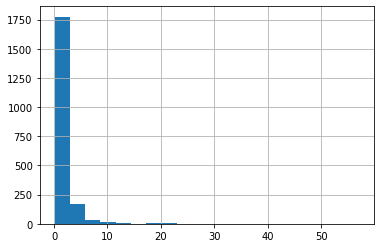

In [98]:
df['balance'].hist(bins=20)
plt.show()

**Duration** stores the value for duration of calls made in Current and previous campaign. <br/>
Before Rescaling, I can recalculate duration to display value per call <br/>
*e.g. duration /previous+campaign'*

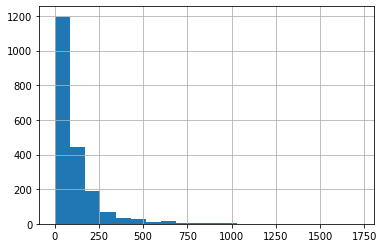

In [99]:
df['duration'] = df['duration']/(df['previous']+df['campaign'])

df['duration'].hist(bins=20)
plt.show()

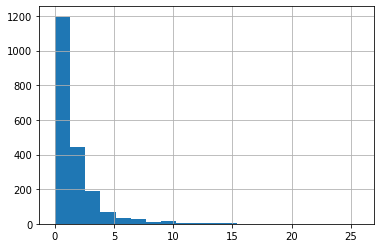

In [100]:
df['duration'] =(df['duration']/df['duration'].median())
df['duration'].hist(bins=20)
plt.show()

I will work on transforming **previous** and **campaign** fields

In [101]:
robust_scaler = RobustScaler()
df[['previous','campaign']] = robust_scaler.fit_transform(df[['previous','campaign']])
df.head(10)

,age,job,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,contact_telephone,contact_nan,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single
0,1,10.0,0,1.089813,1,0,1,4,3.570896,1.0,131,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,2,10.0,0,1.294941,1,1,1,4,1.159204,1.0,133,-0.5,0,0,0,1,0,0,0,1,0,1,0,0
2,3,6.0,0,1.535412,1,1,1,4,0.626866,1.0,239,-0.5,0,0,0,1,0,0,0,1,0,0,1,0
3,2,2.0,0,1.093971,1,1,1,4,1.363184,0.0,238,0.0,0,0,0,1,0,0,0,1,0,0,1,0
4,2,6.0,0,1.513929,1,0,1,4,3.574627,0.0,307,-0.5,0,0,0,1,0,0,0,1,0,0,1,0
5,2,7.0,0,1.459875,1,0,1,4,1.727612,0.0,133,0.5,0,0,0,1,0,0,0,0,1,1,0,0
6,1,2.0,0,2.151490,1,1,1,4,0.800995,1.0,253,-0.5,0,0,0,1,0,0,0,1,0,0,1,0
7,2,8.0,0,1.092585,1,1,1,4,0.468284,3.0,329,1.0,0,0,0,1,0,0,0,1,0,1,0,0
8,3,5.0,0,1.036452,1,0,1,4,0.451493,1.0,135,0.0,0,0,0,1,0,0,0,0,1,1,0,0
9,2,5.0,0,15.181982,0,0,1,4,0.850746,2.0,132,0.0,0,0,0,1,0,0,0,0,1,1,0,0


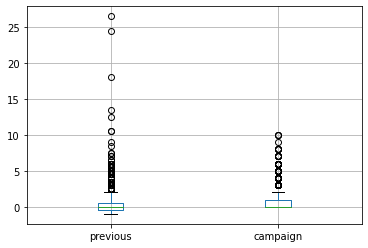

In [102]:
df.boxplot(column=['previous','campaign'])
plt.show()

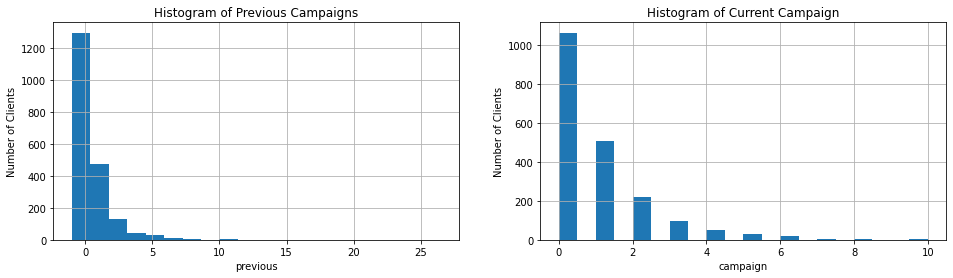

In [104]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Previous Campaigns")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Current Campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Clients')
df['campaign'].hist(bins=20)

plt.show()

In [105]:
df[['previous','campaign']].min()

previous   -1.0
campaign    0.0
dtype: float64

**Previous** column contain negative value, we can shift those values to the interval [1,+∞] before applying a transformation. We also need to set this attribute to be round value



In [0]:
df['previous'] = (df['previous']+ 1.1).round(0).astype(int) 

**campaign** attribute also need to be round value

In [0]:
df['campaign'] = (df['campaign']).round(0).astype(int) 

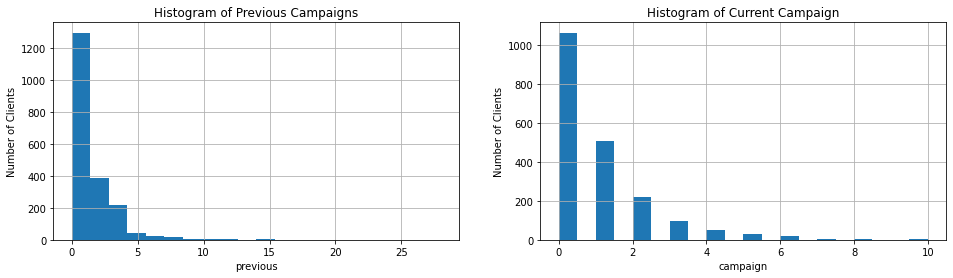

In [108]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))
        
# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Previous Campaigns")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Current Campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Clients')
df['campaign'].hist(bins=20)

plt.show()

Column **pdays** contains many -1 values, this values represent that Client was not contacted in Previous Campaign

In [109]:
df['pdays'].value_counts()

-1      454
 182     68
 181     62
 92      51
 91      41
       ... 
 277      1
 529      1
 532      1
 535      1
 854      1
Name: pdays, Length: 363, dtype: int64

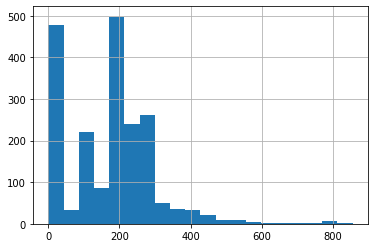

In [110]:
df['pdays'] = (df['pdays']+ 1)
df['pdays'].hist(bins=20)
plt.show()

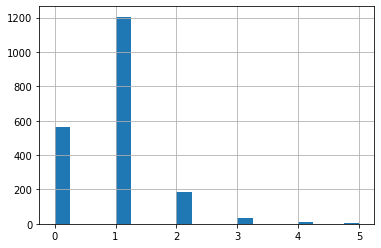

In [111]:
df['pdays'] = (df['pdays']/183).round(0).astype(int)
df['pdays'].hist(bins=20)
plt.show()

Instead of having **previous** and **campaign** attributes, I will create new Attribute **TotalCalls**. <br/>
This Attribute will contain total number of calls to the Client

In [112]:
# Create TotalCalls column and apply a log transformation
df['TotalCalls'] = df_original['previous'] + df_original['campaign']
df[['TotalCalls']] = robust_scaler.fit_transform(df[['TotalCalls']])
df[['TotalCalls']].min()

TotalCalls   -0.666667
dtype: float64

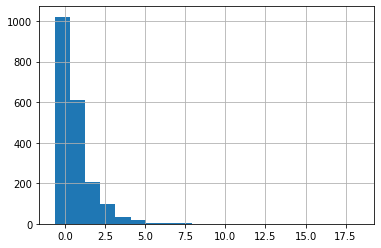

In [113]:
df['TotalCalls'].hist(bins=20)
plt.show()

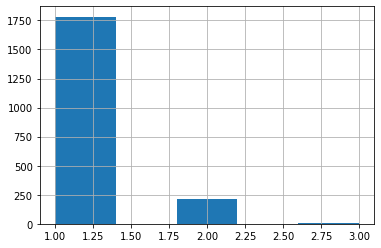

In [114]:
df['TotalCalls'] = np.log((df['TotalCalls']+2.5)).round(0).astype(int)
df['TotalCalls'].hist(bins=5)
plt.show()

Value for calls in **previous** campaign can be derived from **TotalCalls** and **campaign**. So we can remove that attribute

In [0]:
df.drop('previous', axis=1, inplace=True)

# **Save the Prepared Dataset**

In [0]:
df.to_csv('bank_prepared.csv')